**Part 1: Know Your Metrics**

We all remember Captain Sparrow’s famous compass that shows the location of what he wants the most. Without a North Star Metric, this is how we are in terms of growth. We want more customers, more orders, more revenue, more signups, more efficiency…

Before going into coding, we need to understand what exactly is North Star Metric. If you already know and track it, this post can help you do a deep dive analysis with Python. If you don’t know, first you should find yours (probably you are already tracking it but didn’t name it as North Star conceptually). This is how Sean Ellis describes it:

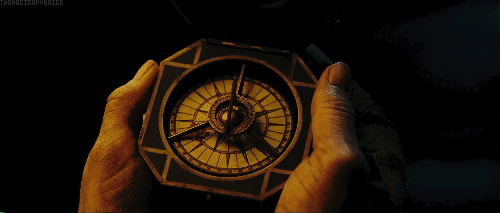

> The North Star Metric is the single metric that best captures the core value that your product delivers to customers.

This metric depends on your company’s product, position, targets & more. Airbnb’s North Star Metric is nights booked whereas for Facebook, it is daily active users.
In our example, we will be using a sample dataset of an online retail. For an online retail, we can select our North Star Metric as Monthly Revenue. Let’s see how our data look like on jupyter notebook.

> **Monthly Revenue**

Let’s start with importing the libraries we need and reading our data from CSV with the help of pandas:

In [ ]:
pip install plotly

In [ ]:
pip install chart_studio

In [ ]:
# import libraries
from datetime import datetime, timedelta
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from __future__ import division

# import plotly.plotly as py
import plotly.offline as pyoff
import plotly.graph_objs as go

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
dataFilePath = '/content/drive/My Drive/Study/DSforBusiness/DataDrivenGrowth/'
!ls /content/drive/My\ Drive/Study/DSforBusiness/DataDrivenGrowth/

'Know Your Metrics.url'   OnlineRetail.csv  'Part 1 - Know Your Metrics.ipynb'


In [ ]:
#initiate visualization library for jupyter notebook 
pyoff.init_notebook_mode()

# plotly.offline.init_notebook_mode(connected=True)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
tx_data = pd.read_csv(dataFilePath+'OnlineRetail.csv', encoding='unicode_escape')

tx_data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


We have all the crucial information we need:
*   Customer ID
*   Unit Price
*   Quantity
*   Invoice Date

With all these features, we can build our North Star Metric equation:

> Revenue = Active Customer Count * Order Count * Average Revenue per Order

It’s time to get our hands dirty. We want to see monthly revenue but unfortunately there is no free lunch. Let’s engineer our data:

In [ ]:
#converting the type of Invoice Date Field from string to datetime.
tx_data['InvoiceDate'] = pd.to_datetime(tx_data['InvoiceDate'])

#creating YearMonth field for the ease of reporting and visualization
tx_data['InvoiceYearMonth'] = tx_data['InvoiceDate'].map(lambda date: 100*date.year + date.month)

#calculate Revenue for each row and create a new dataframe with YearMonth - Revenue columns
tx_data['Revenue'] = tx_data['UnitPrice'] * tx_data['Quantity']
tx_revenue = tx_data.groupby(['InvoiceYearMonth'])['Revenue'].sum().reset_index()
tx_revenue

,InvoiceYearMonth,Revenue
0,201012,748957.020
1,201101,560000.260
2,201102,498062.650
3,201103,683267.080
4,201104,493207.121
5,201105,723333.510
6,201106,691123.120
7,201107,681300.111
8,201108,682680.510
9,201109,1019687.622


Next step, visualization. A line graph would be sufficient:

In [ ]:
#X and Y axis inputs for Plotly graph. We use Scatter for line graphs
plot_data = [
    go.Scatter(
        x=tx_revenue['InvoiceYearMonth'],
        y=tx_revenue['Revenue'],
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Montly Revenue'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

This clearly shows our revenue is growing especially Aug ‘11 onwards (and our data in December is incomplete). Absolute numbers are fine, let’s figure out what is our 
> **Monthly Revenue Growth Rate:**

In [ ]:
#using pct_change() function to see monthly percentage change
tx_revenue['MonthlyGrowth'] = tx_revenue['Revenue'].pct_change()

#showing first 5 rows
tx_revenue.head()

#visualization - line graph
plot_data = [
    go.Scatter(
        x=tx_revenue.query("InvoiceYearMonth < 201112")['InvoiceYearMonth'],
        y=tx_revenue.query("InvoiceYearMonth < 201112")['MonthlyGrowth'],
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Montly Growth Rate'
    )

fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

This clearly shows our revenue is growing especially Aug ‘11 onwards (and our data in December is incomplete). Absolute numbers are fine, let’s figure out what is our

> **Monthly Revenue Growth Rate:**



In [ ]:
#using pct_change() function to see monthly percentage change
tx_revenue['MonthlyGrowth'] = tx_revenue['Revenue'].pct_change()

#showing first 5 rows
tx_revenue.head()

#visualization - line graph
plot_data = [
    go.Scatter(
        x=tx_revenue.query("InvoiceYearMonth < 201112")['InvoiceYearMonth'],
        y=tx_revenue.query("InvoiceYearMonth < 201112")['MonthlyGrowth'],
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Montly Growth Rate'
    )

fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

Everything looks good, we saw 36.5% growth previous month (December is excluded in the code since it hasn’t been completed yet). But we need to identify what exactly happened on April. Was it due to less active customers or our customers did less orders? Maybe they just started to buy cheaper products? We can’t say anything without doing a deep-dive analysis.

> **Monthly Active Customers**

To see the details Monthly Active Customers, we will follow the steps we exactly did for Monthly Revenue. Starting from this part, we will be focusing on UK data only (which has the most records). We can get the monthly active customers by counting unique CustomerIDs. Code snippet and the output are as follows:

In [ ]:
#creating a new dataframe with UK customers only
tx_uk = tx_data.query("Country=='United Kingdom'").reset_index(drop=True)

#creating monthly active customers dataframe by counting unique Customer IDs
tx_monthly_active = tx_uk.groupby('InvoiceYearMonth')['CustomerID'].nunique().reset_index()

#print the dataframe
tx_monthly_active

#plotting the output
plot_data = [
    go.Bar(
        x=tx_monthly_active['InvoiceYearMonth'],
        y=tx_monthly_active['CustomerID'],
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Monthly Active Customers'
    )

fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

tx_monthly_active

,InvoiceYearMonth,CustomerID
0,201012,871
1,201101,684
2,201102,714
3,201103,923
4,201104,817
5,201105,985
6,201106,943
7,201107,899
8,201108,867
9,201109,1177


In April, Monthly Active Customer number dropped to 817 from 923 (-11.5%).

We will see the same trend for number of orders as well.

> **Monthly Order Count**

We will apply the same code by using Quantity field:

In [ ]:
#create a new dataframe for no. of order by using quantity field
tx_monthly_sales = tx_uk.groupby('InvoiceYearMonth')['Quantity'].sum().reset_index()

#print the dataframe
tx_monthly_sales

#plot
plot_data = [
    go.Bar(
        x=tx_monthly_sales['InvoiceYearMonth'],
        y=tx_monthly_sales['Quantity'],
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Monthly Total # of Order'
    )

fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

tx_monthly_sales

,InvoiceYearMonth,Quantity
0,201012,298101
1,201101,237381
2,201102,225641
3,201103,279843
4,201104,257666
5,201105,306452
6,201106,258522
7,201107,324129
8,201108,319804
9,201109,458490


As we expected, Order Count is also declined in April (279k to 257k, -8%)

We know that Active Customer Count directly affected Order Count decrease. At the end, we should definitely check our Average Revenue per Order as well.

> **Average Revenue per Order**

To get this data, we need to calculate the average of revenue for each month:

In [ ]:
# create a new dataframe for average revenue by taking the mean of it
tx_monthly_order_avg = tx_uk.groupby('InvoiceYearMonth')['Revenue'].mean().reset_index()

#print the dataframe
tx_monthly_order_avg

#plot the bar chart
plot_data = [
    go.Bar(
        x=tx_monthly_order_avg['InvoiceYearMonth'],
        y=tx_monthly_order_avg['Revenue'],
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Monthly Order Average'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

tx_monthly_order_avg

,InvoiceYearMonth,Revenue
0,201012,16.865860
1,201101,13.614680
2,201102,16.093027
3,201103,16.716166
4,201104,15.773380
5,201105,17.713823
6,201106,16.714748
7,201107,15.723497
8,201108,17.315899
9,201109,18.931723


Even the monthly order average dropped for April (16.7 to 15.8). We observed slow-down in every metric affecting our North Star.

We have looked at our major metrics. Of course there are many more and it varies across industries. Let’s continue investigating some other important metrics:

*   New Customer Ratio: a good indicator of if we are losing our existing customers or unable to attract new ones
*   Retention Rate: King of the metrics. Indicates how many customers we retain over specific time window. We will be showing examples for monthly retention rate and cohort based retention rate.

> **New Customer Ratio**

First we should define what is a new customer. In our dataset, we can assume a new customer is whoever did his/her first purchase in the time window we defined. We will do it monthly for this example.

We will be using **.min()** function to find our first purchase date for each customer and define new customers based on that. The code below will apply this function and show us the revenue breakdown for each group monthly.

In [ ]:
#create a dataframe contaning CustomerID and first purchase date
tx_min_purchase = tx_uk.groupby('CustomerID').InvoiceDate.min().reset_index()
tx_min_purchase.columns = ['CustomerID','MinPurchaseDate']
tx_min_purchase['MinPurchaseYearMonth'] = tx_min_purchase['MinPurchaseDate'].map(lambda date: 100*date.year + date.month)

#merge first purchase date column to our main dataframe (tx_uk)
tx_uk = pd.merge(tx_uk, tx_min_purchase, on='CustomerID')

tx_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue,MinPurchaseDate_x,MinPurchaseYearMonth_x,UserType,MinPurchaseDate_y,MinPurchaseYearMonth_y,MinPurchaseDate_x,MinPurchaseYearMonth_x,MinPurchaseDate_y,MinPurchaseYearMonth_y,MinPurchaseDate,MinPurchaseYearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012,15.30,2010-12-01 08:26:00,201012,New,2010-12-01 08:26:00,201012,2010-12-01 08:26:00,201012,2010-12-01 08:26:00,201012,2010-12-01 08:26:00,201012
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012,New,2010-12-01 08:26:00,201012,2010-12-01 08:26:00,201012,2010-12-01 08:26:00,201012,2010-12-01 08:26:00,201012
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012,22.00,2010-12-01 08:26:00,201012,New,2010-12-01 08:26:00,201012,2010-12-01 08:26:00,201012,2010-12-01 08:26:00,201012,2010-12-01 08:26:00,201012
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012,New,2010-12-01 08:26:00,201012,2010-12-01 08:26:00,201012,2010-12-01 08:26:00,201012,2010-12-01 08:26:00,201012
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012,New,2010-12-01 08:26:00,201012,2010-12-01 08:26:00,201012,2010-12-01 08:26:00,201012,2010-12-01 08:26:00,201012


In [ ]:
#create a column called User Type and assign Existing 
#if User's First Purchase Year Month before the selected Invoice Year Month
tx_uk['UserType'] = 'New'
tx_uk.loc[tx_uk['InvoiceYearMonth']>tx_uk['MinPurchaseYearMonth'],'UserType'] = 'Existing'

#calculate the Revenue per month for each user type
tx_user_type_revenue = tx_uk.groupby(['InvoiceYearMonth','UserType'])['Revenue'].sum().reset_index()

#filtering the dates and plot the result
tx_user_type_revenue = tx_user_type_revenue.query("InvoiceYearMonth != 201012 and InvoiceYearMonth != 201112")
tx_user_type_revenue

,InvoiceYearMonth,UserType,Revenue
1,201101,Existing,195275.510
2,201101,New,156705.770
3,201102,Existing,220994.630
4,201102,New,127859.000
5,201103,Existing,296350.030
6,201103,New,160567.840
7,201104,Existing,268226.660
8,201104,New,108517.751
9,201105,Existing,434725.860
10,201105,New,90847.490


In [ ]:
plot_data = [
    go.Scatter(
        x=tx_user_type_revenue.query("UserType == 'Existing'")['InvoiceYearMonth'],
        y=tx_user_type_revenue.query("UserType == 'Existing'")['Revenue'],
        name = 'Existing'
    ),
    go.Scatter(
        x=tx_user_type_revenue.query("UserType == 'New'")['InvoiceYearMonth'],
        y=tx_user_type_revenue.query("UserType == 'New'")['Revenue'],
        name = 'New'
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='New vs Existing'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

Existing customers are showing a positive trend and tell us that our customer base is growing but new customers have a slight negative trend.


> Let’s have a better view by looking at the **New Customer Ratio:**



In [ ]:
#create a dataframe that shows new user ratio - we also need to drop NA values (first month new user ratio is 0)
tx_user_ratio = tx_uk.query("UserType == 'New'").groupby(['InvoiceYearMonth'])['CustomerID'].nunique()/tx_uk.query("UserType == 'Existing'").groupby(['InvoiceYearMonth'])['CustomerID'].nunique() 
tx_user_ratio = tx_user_ratio.reset_index()
tx_user_ratio = tx_user_ratio.dropna()

#print the dafaframe
tx_user_ratio

#plot the result

plot_data = [
    go.Bar(
        x=tx_user_ratio.query("InvoiceYearMonth>201101 and InvoiceYearMonth<201112")['InvoiceYearMonth'],
        y=tx_user_ratio.query("InvoiceYearMonth>201101 and InvoiceYearMonth<201112")['CustomerID'],
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='New Customer Ratio'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

New Customer Ratio has declined as expected (we assumed on Feb, all customers were New) and running around 20%.

> **Monthly Retention Rate**

Retention rate should be monitored very closely because it indicates how sticky is your service and how well your product fits the market. For making Monthly Retention Rate visualized, we need to calculate how many customers retained from previous month.

**Monthly Retention Rate** = Retained Customers From Prev. Month/Active Customers Total

We will be using **crosstab()** function of pandas which makes calculating Retention Rate super easy.

In [ ]:
#identify which users are active by looking at their revenue per month
tx_user_purchase = tx_uk.groupby(['CustomerID','InvoiceYearMonth'])['Revenue'].sum().reset_index()
tx_user_purchase

,CustomerID,InvoiceYearMonth,Revenue
0,12346.0,201101,0.00
1,12747.0,201012,706.27
2,12747.0,201101,303.04
3,12747.0,201103,310.78
4,12747.0,201105,771.31
...,...,...,...
12325,18283.0,201110,114.65
12326,18283.0,201111,651.56
12327,18283.0,201112,208.00
12328,18287.0,201105,765.28


In [ ]:
#create retention matrix with crosstab
tx_retention = pd.crosstab(tx_user_purchase['CustomerID'], tx_user_purchase['InvoiceYearMonth']).reset_index()

tx_retention.head()

InvoiceYearMonth,CustomerID,201012,201101,201102,201103,201104,201105,201106,201107,201108,201109,201110,201111,201112
0,12346.0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,12747.0,1,1,0,1,0,1,1,0,1,0,1,1,1
2,12748.0,1,1,1,1,1,1,1,1,1,1,1,1,1
3,12749.0,0,0,0,0,0,1,0,0,1,0,0,1,1
4,12820.0,0,1,0,0,0,0,0,0,0,1,1,0,1


Retention table shows us which customers are active on each month (1 stands for active).

With the help of a simple for loop, for each month we calculate Retained Customer Count from previous month and Total Customer Count.

In the end, we have our Retention Rate dataframe & line chart like below:

In [ ]:
#create an array of dictionary which keeps Retained & Total User count for each month
months = tx_retention.columns[2:]
retention_array = []
for i in range(len(months)-1):
    retention_data = {}
    selected_month = months[i+1]
    prev_month = months[i]
    retention_data['InvoiceYearMonth'] = int(selected_month)
    retention_data['TotalUserCount'] = tx_retention[selected_month].sum()
    retention_data['RetainedUserCount'] = tx_retention[(tx_retention[selected_month]>0) & (tx_retention[prev_month]>0)][selected_month].sum()
    retention_array.append(retention_data)
    
#convert the array to dataframe and calculate Retention Rate
tx_retention = pd.DataFrame(retention_array)
tx_retention['RetentionRate'] = tx_retention['RetainedUserCount']/tx_retention['TotalUserCount']
tx_retention

,InvoiceYearMonth,TotalUserCount,RetainedUserCount,RetentionRate
0,201102,714,263,0.368347
1,201103,923,305,0.330444
2,201104,817,310,0.379437
3,201105,985,369,0.374619
4,201106,943,417,0.442206
5,201107,899,379,0.421580
6,201108,867,391,0.450980
7,201109,1177,417,0.354291
8,201110,1285,502,0.390661
9,201111,1548,616,0.397933


In [ ]:
#plot the retention rate graph
plot_data = [
    go.Scatter(
        x=tx_retention.query("InvoiceYearMonth<201112")['InvoiceYearMonth'],
        y=tx_retention.query("InvoiceYearMonth<201112")['RetentionRate'],
        name="organic"
    )
    
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Monthly Retention Rate'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

Monthly Retention Rate significantly jumped from June to August and went back to previous levels afterwards.

> **Cohort Based Retention Rate**

There is another way of measuring Retention Rate which allows you to see Retention Rate for each cohort. Cohorts are determined as first purchase year-month of the customers. We will be measuring what percentage of the customers retained after their first purchase in each month. This view will help us to see how recent and old cohorts differ regarding retention rate and if recent changes in customer experience affected new customer’s retention or not.

This will be a bit more complicated than others in terms of coding.

In [ ]:
#create our retention table again with crosstab() and add firs purchase year month view
tx_retention = pd.crosstab(tx_user_purchase['CustomerID'], tx_user_purchase['InvoiceYearMonth']).reset_index()
tx_retention = pd.merge(tx_retention,tx_min_purchase[['CustomerID','MinPurchaseYearMonth']],on='CustomerID')
new_column_names = [ 'm_' + str(column) for column in tx_retention.columns[:-1]]
new_column_names.append('MinPurchaseYearMonth')
tx_retention.columns = new_column_names

#create the array of Retained users for each cohort monthly
retention_array = []
for i in range(len(months)):
    retention_data = {}
    selected_month = months[i]
    prev_months = months[:i]
    next_months = months[i+1:]
    for prev_month in prev_months:
        retention_data[prev_month] = np.nan
        
    total_user_count = tx_retention[tx_retention.MinPurchaseYearMonth ==  selected_month].MinPurchaseYearMonth.count()
    retention_data['TotalUserCount'] = total_user_count
    retention_data[selected_month] = 1 
    
    query = "MinPurchaseYearMonth == {}".format(selected_month)
    

    for next_month in next_months:
        new_query = query + " and {} > 0".format(str('m_' + str(next_month)))
        retention_data[next_month] = np.round(tx_retention.query(new_query)['m_' + str(next_month)].sum()/total_user_count,2)
    retention_array.append(retention_data)
    
tx_retention = pd.DataFrame(retention_array)
tx_retention.index = months

#showing new cohort based retention table
tx_retention

,TotalUserCount,201101,201102,201103,201104,201105,201106,201107,201108,201109,201110,201111,201112
InvoiceYearMonth,,,,,,,,,,,,,
201101,362,1.0,0.23,0.28,0.25,0.34,0.29,0.26,0.26,0.31,0.35,0.36,0.15
201102,339,NaN,1.00,0.25,0.19,0.28,0.28,0.25,0.26,0.28,0.28,0.31,0.10
201103,408,NaN,NaN,1.00,0.19,0.26,0.22,0.23,0.17,0.26,0.24,0.29,0.09
201104,276,NaN,NaN,NaN,1.00,0.22,0.22,0.22,0.21,0.23,0.23,0.26,0.08
201105,252,NaN,NaN,NaN,NaN,1.00,0.23,0.17,0.17,0.21,0.24,0.27,0.10
201106,207,NaN,NaN,NaN,NaN,NaN,1.00,0.21,0.16,0.25,0.26,0.32,0.10
201107,172,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0.20,0.19,0.23,0.28,0.11
201108,140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0.26,0.23,0.26,0.14
201109,275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0.29,0.33,0.12


We can see that first month retention rate became better recently (don’t take Dec ’11 into account) and in almost 1 year, 15% of our customers retain with us.

Finally…We know our metrics and how to track/analyze them with Python.

You can find the jupyter notebook of this article here.

Let’s try to segment our base to see who are our best customers in Part 2.